In [134]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
import cv2
import os
from os import listdir
from os.path import isfile, join
from aux import DrawCircles, ScaleImage
from circle import Find_Optimum_Circles, Find_Best_Circle, Deriv

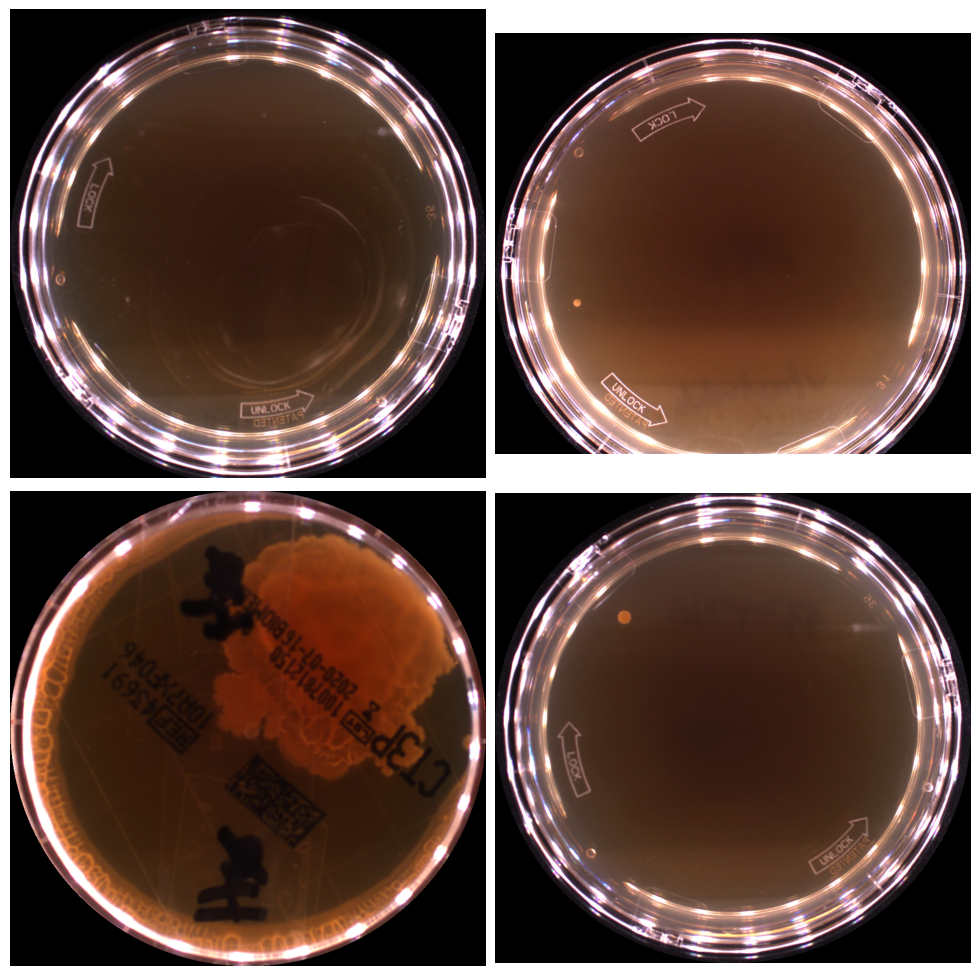

In [51]:
#get a list of files in the folder with pics
folder_path = os.path.abspath('.')+'/Smpl_Im'
processed_path = os.path.abspath('.')+'/Smpl_Thresh'
file_names = [f for f in listdir(folder_path) if isfile(join(folder_path, f))]
raw_images = []
for file in file_names:
    image = cv2.imread(folder_path+'/'+file)
    #image = ScaleImage(image)
    raw_images.append(image)
num_col = 2
num_row = 2
fig, axs = plt.subplots(nrows=num_row, ncols=num_col, figsize=(12,12))

for i, j in [(i,j) for i in np.arange(num_col) for j in np.arange(num_row)]:
    idx = num_col*j+i
    if idx < len(raw_images):
        img = raw_images[idx]
        axs[j,i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[j,i].axis('off')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.02, hspace=0.02)
plt.show()

In [52]:
images = []
for file in file_names:
    image = cv2.imread(folder_path+'/'+file)
    image = ScaleImage(image)
    images.append(image)

In [65]:
# Get circles

#These are the Hough Transform parameters that we are going to use
accum_res  = 3 # image resolution/accum resolution, 4 means accum is 1/4th of image
min_between = 5 #Min dist between circles. 
minRadius = 500 #Min radius of a circle. 
maxRadius= 740 #The bigest circle expected
Canny_thr = 1100 #anything above that is an edge automatically in Canny, the lower threshold is half of that.
Accum_thr = 1100 #accumulator threshold for the circle centers at the detection stage
params = [accum_res, min_between, Canny_thr, Accum_thr, minRadius, maxRadius]


images_circ = []
for img in images:
    params.clear()
    params = [accum_res, min_between, Canny_thr, Accum_thr, minRadius, maxRadius]
    Circles = Find_Optimum_Circles(params_Hough=params, img = img, min_num  = 15, max_num = 30)
    im_w_circ = img.copy()
    for i in Circles:
        # draw the center of the circle
        cv2.circle(im_w_circ  ,(i[0],i[1]),4,(0,0,255),4)
        # draw the outer circle
        cv2.circle(im_w_circ ,(i[0],i[1]),i[2],(0,255,0),4)
    images_circ.append(im_w_circ)

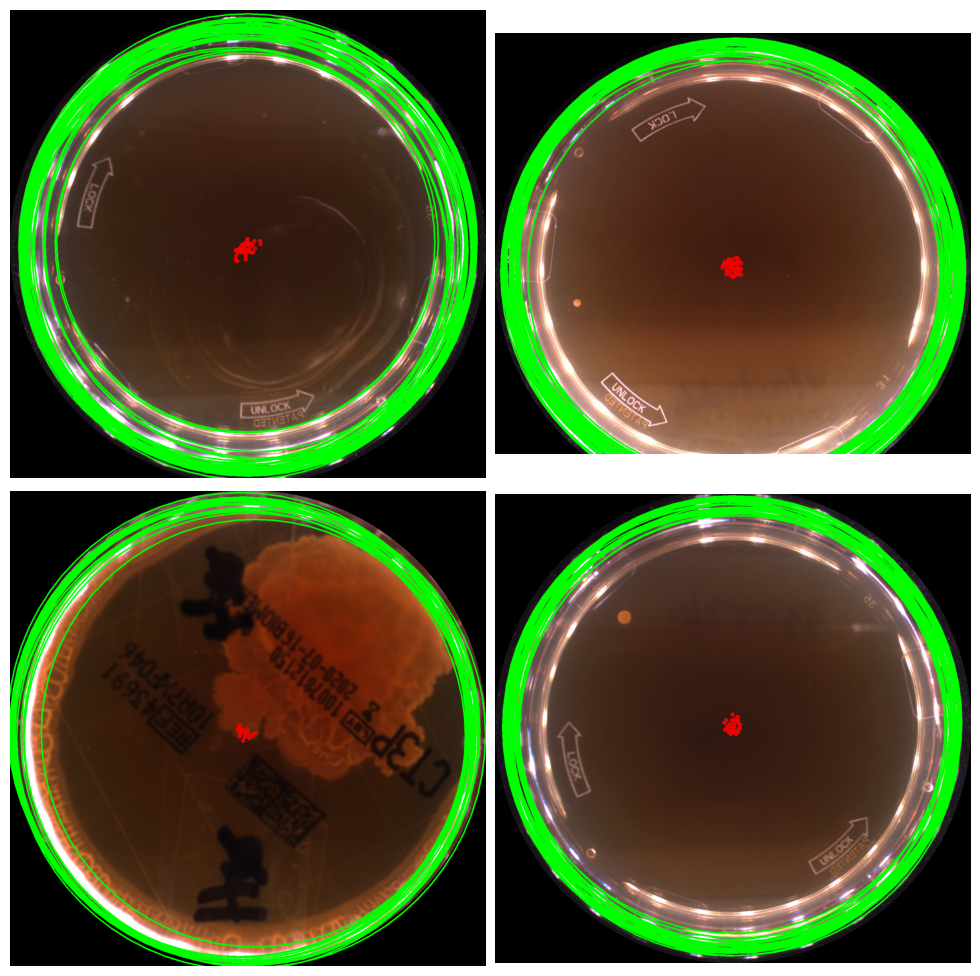

In [66]:
num_col = 2
num_row = 2
fig, axs = plt.subplots(nrows=num_row, ncols=num_col, figsize=(12,12))

for i, j in [(i,j) for i in np.arange(num_col) for j in np.arange(num_row)]:
    idx = num_col*j+i
    if idx < len(images):
        img = images_circ[idx]
        axs[j,i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[j,i].axis('off')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.02, hspace=0.02)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

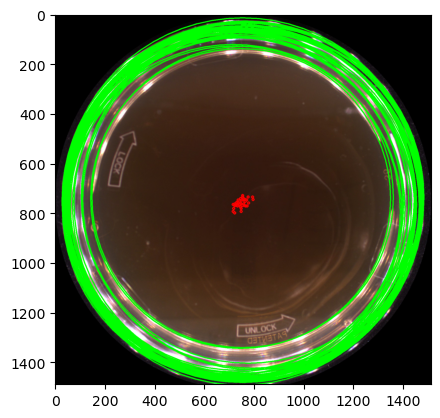

In [69]:
img = images[0]
im_w_circ = img.copy()
params.clear()
params = [accum_res, min_between, Canny_thr, Accum_thr, minRadius, maxRadius]
Circles = Find_Optimum_Circles(params_Hough=params, img = img, min_num  = 15, max_num = 30)
for i in Circles:
    # draw the center of the circle
    cv2.circle(im_w_circ  ,(i[0],i[1]),4,(0,0,255),4)
    # draw the outer circle
    cv2.circle(im_w_circ ,(i[0],i[1]),i[2],(0,255,0),4)
plt.imshow(cv2.cvtColor(im_w_circ, cv2.COLOR_BGR2RGB))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

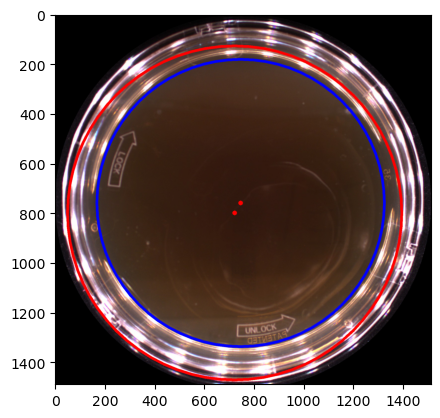

In [158]:
img = images[0]
im_w_circ = img.copy()
params.clear()
params = [accum_res, min_between, Canny_thr, Accum_thr, minRadius, maxRadius]
Circles = Find_Optimum_Circles(params_Hough=params, img = img, min_num  = 30, max_num = 100)
sorted_circles = Circles[np.argsort(Circles[:, 1])]

# draw the worst circle
worst_circ = sorted_circles[-1]
cv2.circle(im_w_circ  ,(worst_circ[0],worst_circ[1]),4,(0,0,255),10)
cv2.circle(im_w_circ ,(worst_circ[0],worst_circ[1]),worst_circ[2],(0,0,255),10)

# draw the cbest circle
best_circ = Find_Best_Circle(Circles, img)[0]
cv2.circle(im_w_circ  ,(best_circ[0],best_circ[1]),4,(0,0,255),10)
cv2.circle(im_w_circ ,(best_circ[0],best_circ[1]),best_circ[2],(255,0,0),10)

plt.imshow(cv2.cvtColor(im_w_circ, cv2.COLOR_BGR2RGB))
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

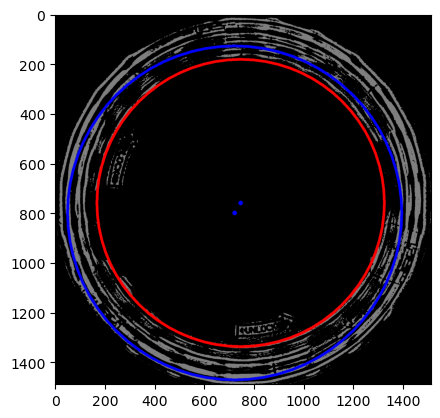

In [159]:
img_gr = cv2.adaptiveThreshold(images[0][:,:,0],255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,41,12)
img_gr = cv2.bitwise_not(img_gr)
img_color = cv2.cvtColor(img_gr, cv2.COLOR_GRAY2BGR)//2

# draw the worst circle
cv2.circle(img_color ,(worst_circ[0],worst_circ[1]),4,(0,0,255),10)
cv2.circle(img_color ,(worst_circ[0],worst_circ[1]),worst_circ[2],(0,0,255),10)

# draw the cbest circle
cv2.circle(img_color  ,(best_circ[0],best_circ[1]),4,(0,0,255),10)
cv2.circle(img_color ,(best_circ[0],best_circ[1]),best_circ[2],(255,0,0),10)

plt.imshow(img_color)
plt.show

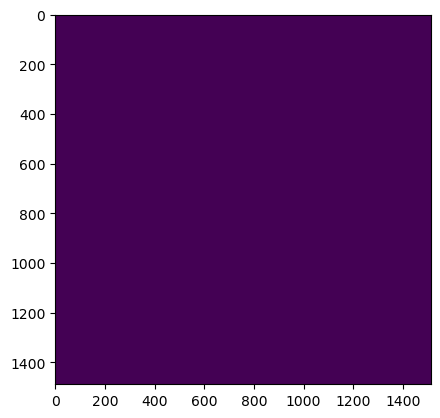

In [168]:
# Make a circular band mask
img_gr = cv2.adaptiveThreshold(images[0][:,:,0],255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,41,12)
img_gr = cv2.bitwise_not(img_gr)
radius = 910
band_width = 50
bad_center = (worst_circ[0],worst_circ[1])
in_radius_sq = radius**2
out_radius_sq = (radius+band_width)**2
h = img_gr.shape[0] # Image height
w = img_gr.shape[1] # Image width
Y, X = np.ogrid[:h, :w]
dist_from_center_sq = (Y - bad_center[1])**2 + (X-bad_center[0])**2
mask = (dist_from_center_sq >= in_radius_sq ) & (dist_from_center_sq <= out_radius_sq)
img_gr[~mask] = 0
plt.imshow(img_gr)

In [162]:
img_gr = cv2.adaptiveThreshold(images[0][:,:,0],255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,41,12)
img_gr = cv2.bitwise_not(img_gr)
Der_bad = 10000* Deriv(image= img_gr, center = bad_center,  min_radius = 500, max_radius = 700, step = 5)
good_center = (best_circ[0],best_circ[1])
Der_good = 10000* Deriv(image= img_gr, center = good_center,  min_radius = 500, max_radius = 700, step = 5)

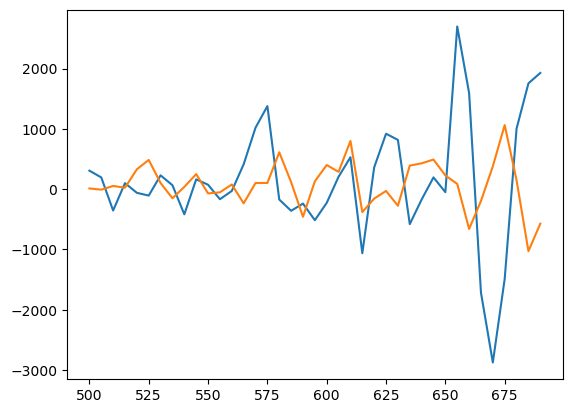

In [167]:

plt.plot(np.arange(500,695,5), Der_good)
plt.plot(np.arange(500,695,5), Der_bad)
plt.show()

4.760206

In [ ]:
# Draw histograms
num_col = 2
num_row = 2
fig, axs = plt.subplots(nrows=num_row, ncols=num_col, figsize=(12,12))

for i, j in [(i,j) for i in np.arange(num_col) for j in np.arange(num_row)]:
    idx = num_col*j+i
    if idx < len(images):
        img = images[idx]
        # split the image into blue, green and red channels
        channels = cv2.split(img)
        colors = ("b", "g", "r")
        # loop over the image channels
        for (channel, color) in zip(channels, colors):
            # compute the histogram for the current channel and plot it
            hist = cv2.calcHist(images = [channel], channels=[0], mask = None, histSize=[256], ranges = [3, 256])
            axs[j,i].plot(hist, color=color)
            axs[j,i].yaxis.set_tick_params(labelleft=False)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.6)
plt.show()